# Team Data Science:

## Objective: 
### Data Prediction Models on Parkinson’s disease Data using Machine Learning Algorithms in Python.

We started with the the tutorial on XGBoost algorithm.
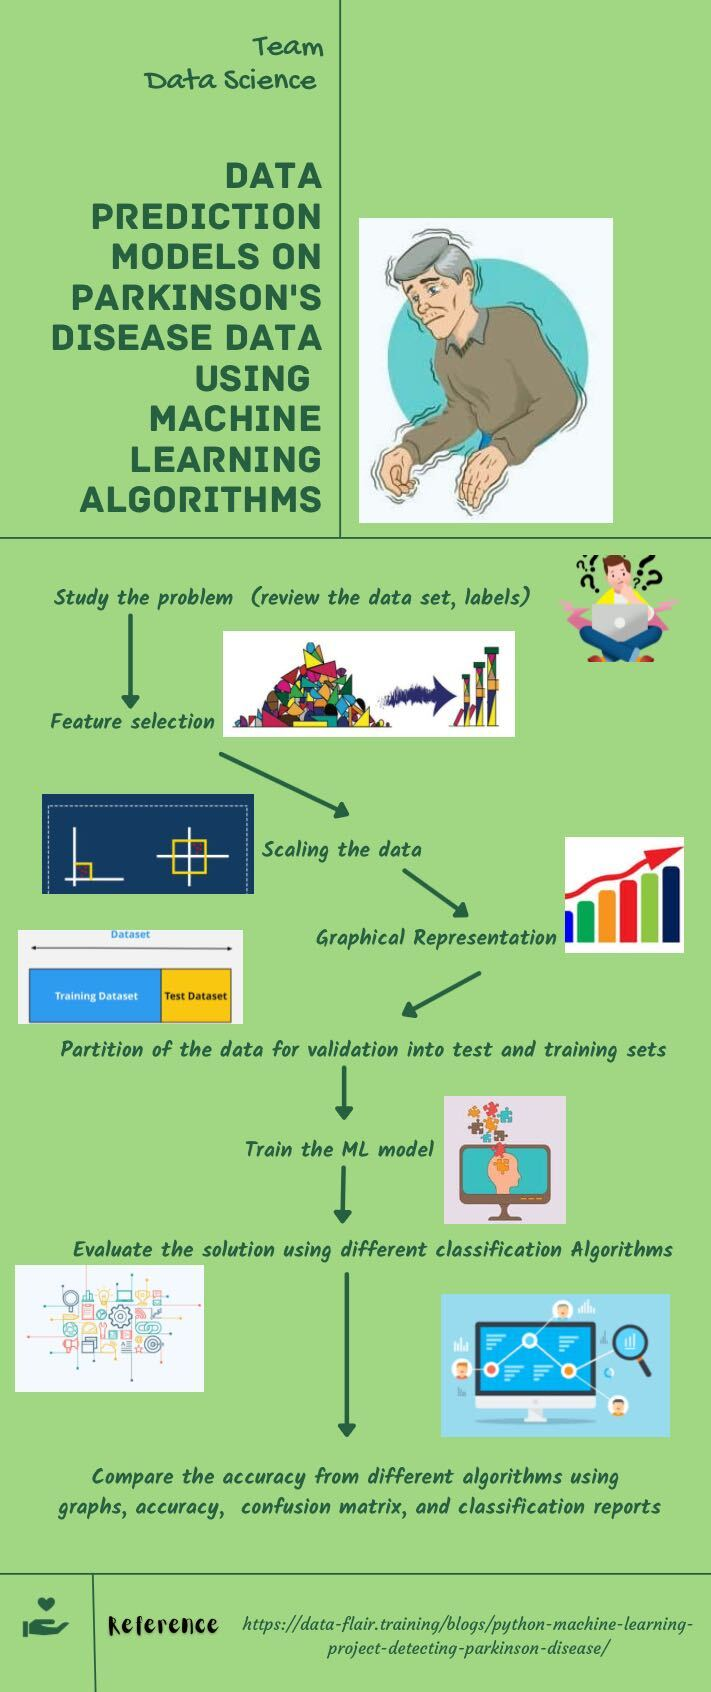
    

The approach to handle these problems is to get to know more about the data, it’s features and finding the best fitting algorithms. 

### Python Packages used:

Numpy: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Pandas: pandas is a software library written for the Python programming language for data  manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

Scikit-learn: Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Seaborn, Matplotlib: Seaborn and Matplotlib are two of Python's most powerful visualization libraries. Seaborn uses fewer syntax and has stunning default themes and Matplotlib is more easily customizable through accessing the classes.

Os, warnings: The OS module in Python provides functions for interacting with the operating system. OS comes under Python's standard utility modules.

In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### About the Data :
Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.<br>
We took the UCI ML Parkinsons dataset for this. The dataset has 24 columns and 195 records and is only 39.7 KB.<br>

Data Set Characteristics: Multivariate<br>
Number of Instances: 197<br>
Area: Life<br>
Attribute Characteristics: Real<br>
Number of Attributes: 23<br>
Date Donated: 2008-06-26<br>
Associated Tasks: Classification<br>
Missing Values? N/A<br>

### Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.


### Attribute Information:

Matrix column entries (attributes):<br>
name - ASCII subject name and recording number<br>
MDVP:Fo(Hz) - Average vocal fundamental frequency.<br>
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency.<br>
MDVP:Flo(Hz) - Minimum vocal fundamental frequency.<br>
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency.<br>
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude.<br>
NHR,HNR - Two measures of ratio of noise to tonal components in the voice status - Health status of the subject (one) - Parkinson's, (zero) - healthy.<br>
RPDE,D2 - Two nonlinear dynamical complexity measures.<br>
DFA - Signal fractal scaling exponent.<br>
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation.<br>

In [2]:
df=pd.read_csv('../Downloads/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Data Preprocessing
Data is loaded, features and label variables are separated out and whole data is TRANSFORMED. 
Data is transformed to make it better-organized. Properly formatted and validated data improves data quality and protects applications from potential landmines such as null values, unexpected duplicates, incorrect indexing, and incompatible formats.
Splitting the data into train and test sets is done by the function present in sci-kit learn library. The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. 

In [3]:
features = df.loc[:,df.columns!='status'].values[:,1:]
labels = df.loc[:,'status'].values
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(features)
y = labels
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

### Analysis using Models

Initially we used the XGBoost algorithm for model preparation. And following we used different algorithms just to compare the efficiency of the models built and which one would be most accurate. Let's look at different models used:

## XGBOOST
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks.

In [4]:
model = XGBClassifier()
model.fit(x_train,y_train)

[07:47:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5]:
y_pred = model.predict(x_test)
print("Accuracy %: ", accuracy_score(y_test, y_pred)*100)

Accuracy %:  94.87179487179486


Text(0.5, 1.0, 'Average vocal fundamental frequency MDVP:Fo(Hz) Distribution plot')

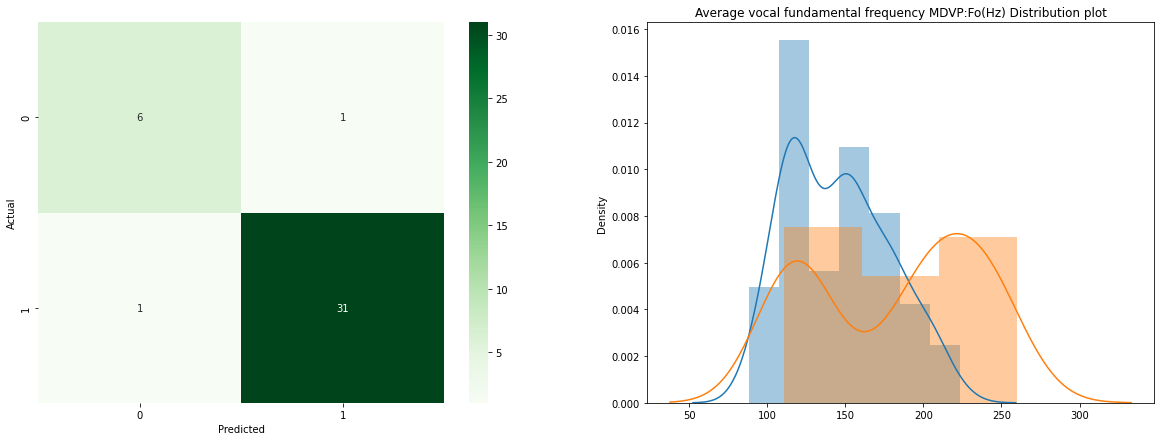

In [6]:
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
diseased_freq_avg = df[df["status"] == 1]["MDVP:Fo(Hz)"].values
healthy_freq_avg = df[df["status"] == 0]["MDVP:Fo(Hz)"].values

fig, axis = plt.subplots(1,2, figsize=(20, 7))

# Confusion Matix Heatmap
sn.heatmap(cm, annot=True, fmt='d', cmap="Greens", ax=axis[0])
axis[0].set(xlabel='Predicted', ylabel='Actual')

# Histogram plot
sn.distplot(diseased_freq_avg, hist=True, label="Parkinson's Disease Cases")
sn.distplot(healthy_freq_avg, hist=True, label="Healthy Cases")
plt.title("Average vocal fundamental frequency MDVP:Fo(Hz) Distribution plot")

# Analyse of data using other Algorithms:

### Function used by algorithms to run and plot graphs.

In [7]:
def Model(model, x_train,x_test,y_train,y_test, graph) :
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    probabilities = model.predict_proba(x_test)
    print("Accuracy %: ", accuracy_score(y_test, prediction)*100)

    cm = confusion_matrix(y_test, prediction)
    
    print(classification_report(y_test, prediction))
  
    F,T,thresholds = roc_curve(y_test, probabilities[:,1])
    
    if graph:
        fig, axis = plt.subplots(1,2, figsize=(20, 7))
        
        # HeatMAP
        sn.heatmap(cm, fmt='', annot = True, cmap="gray_r", ax=axis[0])
        axis[0].set(xlabel='Predicted', ylabel='Actual')
        
        # Lineplot
        plt.title('Receiver Operating Characteristic')
        sn.lineplot(F, T, ax=axis[1])
        axis[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate')
        plt.show()

In [8]:
df_train = df.copy().drop(columns=["name"])
columns, primary = df_train.columns.tolist(), ["status"]
columns.remove(primary[0])
df_train = df_train[columns + primary]

std = StandardScaler()
scaled = pd.DataFrame(std.fit_transform(df_train[columns]), columns=columns)
df_train = pd.concat([scaled, df["status"]], axis=1)

In [9]:
X, Y = df_train[columns], df_train[primary]

In [10]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 10)
train_y, test_y = train_y["status"], test_y["status"]

## Logistic Regression:
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

Accuracy %:  89.83050847457628
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.89      0.98      0.93        43

    accuracy                           0.90        59
   macro avg       0.91      0.83      0.86        59
weighted avg       0.90      0.90      0.89        59



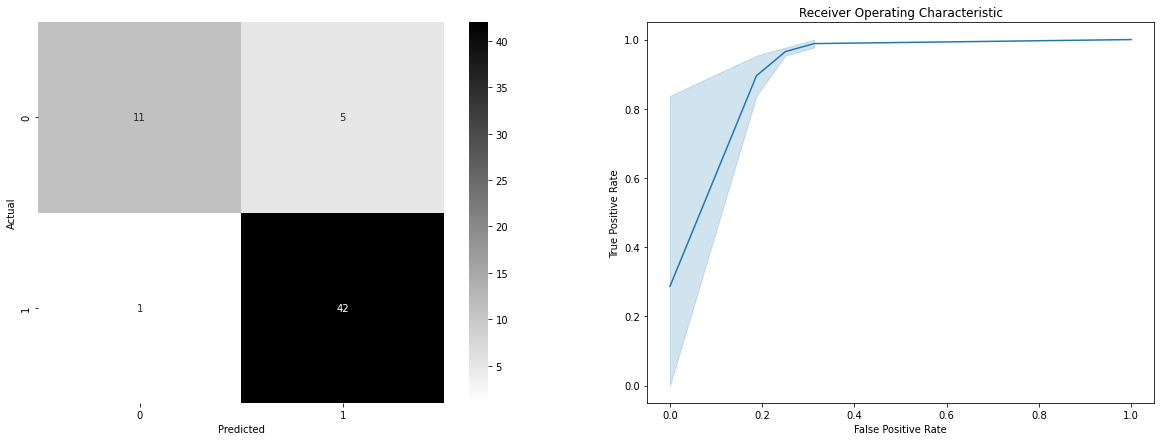

In [11]:
lr = LogisticRegression()
Model(lr, train_X, test_X, train_y, test_y, graph = True)

## Support Vector Machine:
Support vector machines (SVMs) are powerful yet flexible supervised machine learning algorithms which are used both for classification and regression. But generally, they are used
in classification problems. They are extremely popular because of their ability to handle multiple
continuous and categorical variables. An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

Accuracy %:  84.7457627118644
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       0.83      1.00      0.91        43

    accuracy                           0.85        59
   macro avg       0.91      0.72      0.76        59
weighted avg       0.87      0.85      0.82        59



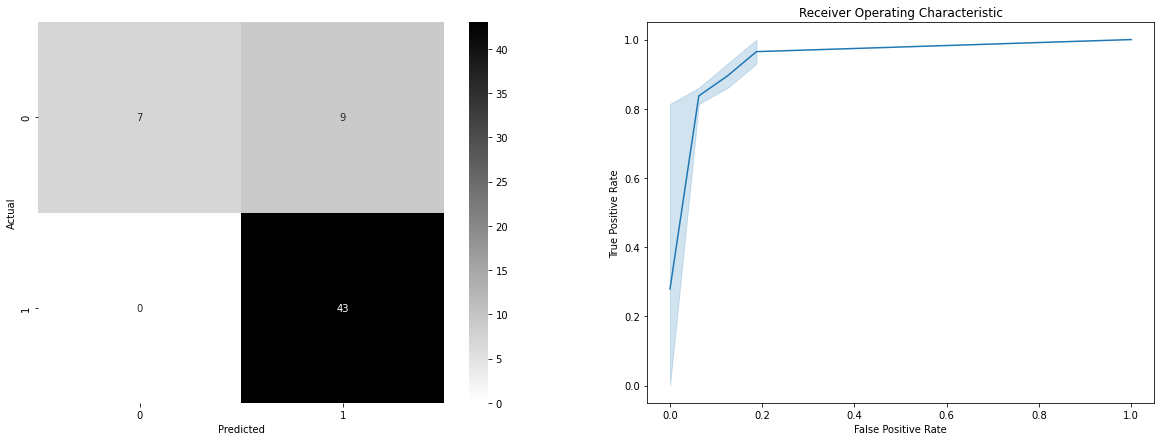

In [12]:
svm = SVC(probability=True)
Model(svm, train_X, test_X, train_y, test_y, graph = True)

## Gaussian Naive Bayes:
Naïve Bayes algorithm is a classification technique based on applying Bayes’ theorem with a strong assumption that all the predictors are independent of each other. In simple words, the assumption is that the presence of a feature in a class is independent of the presence of any other feature in the same class.

Accuracy %:  77.96610169491525
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        16
           1       1.00      0.70      0.82        43

    accuracy                           0.78        59
   macro avg       0.78      0.85      0.77        59
weighted avg       0.88      0.78      0.79        59



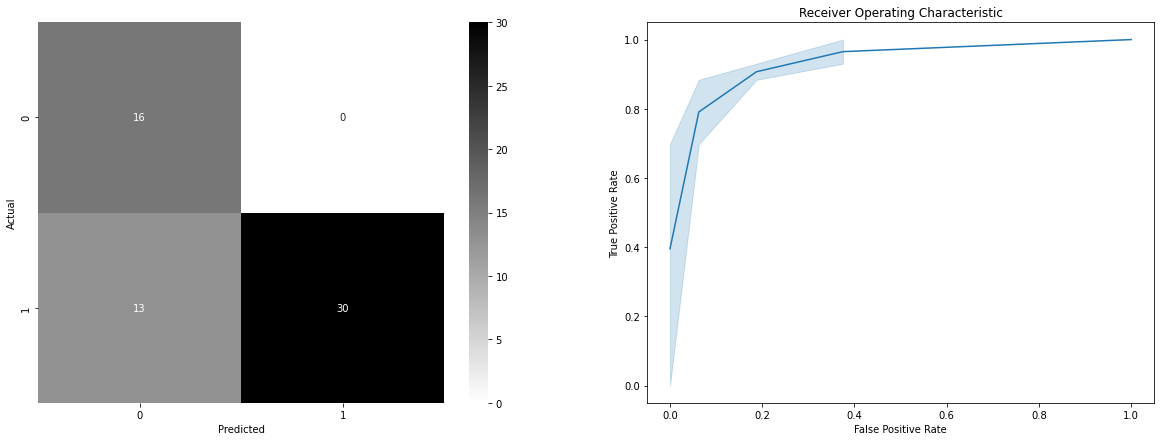

In [13]:
gnb = GaussianNB()
Model(gnb, train_X, test_X, train_y, test_y, graph = True)

## K-Neighbour Classifier:
K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification of predictive problems in industry. The following two properties would define KNN well −
Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.
Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

Accuracy %:  86.4406779661017
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.86      0.98      0.91        43

    accuracy                           0.86        59
   macro avg       0.88      0.77      0.80        59
weighted avg       0.87      0.86      0.85        59



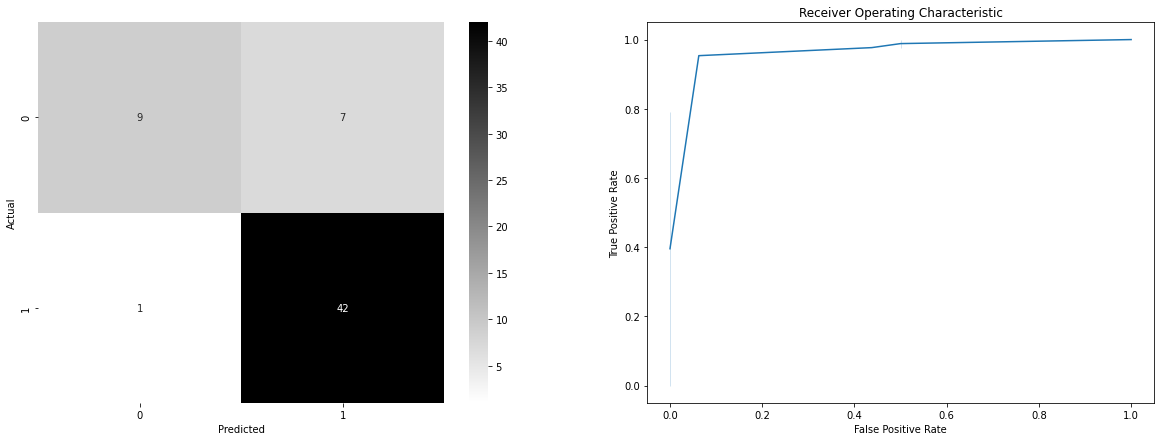

In [14]:
kn = neighbors.KNeighborsClassifier()
Model(kn, train_X, test_X, train_y, test_y, graph = True)

## Random Forest Classifier:
Random Forest is a popular machine learning algorithm that belongs to the supervised learning  technique. It can be used for both Classification and Regression problems in ML. It is based     on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Accuracy %:  93.22033898305084
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.93      0.98      0.95        43

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



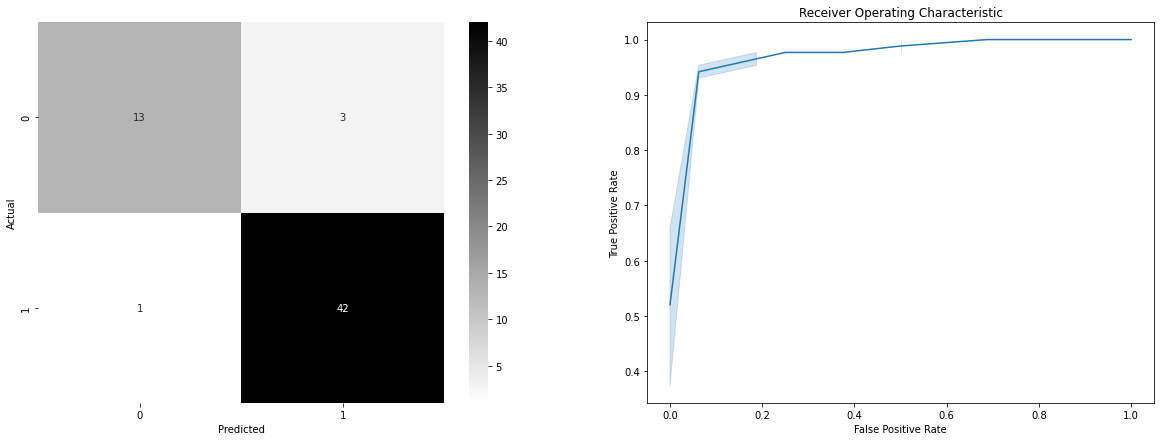

In [15]:
rfc = RandomForestClassifier()
Model(rfc, train_X, test_X, train_y, test_y, graph = True)

## Decision Tree Classifier:
Decision tree analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. Decisions trees are the most powerful algorithms
that falls under the category of supervised algorithms. They can be used for both classification and regression tasks. The two main entities of a tree are decision nodes, where the data is split and leaves, where we get the outcome.


Accuracy %:  84.7457627118644
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.89      0.91      0.90        43

    accuracy                           0.85        59
   macro avg       0.81      0.80      0.80        59
weighted avg       0.84      0.85      0.85        59



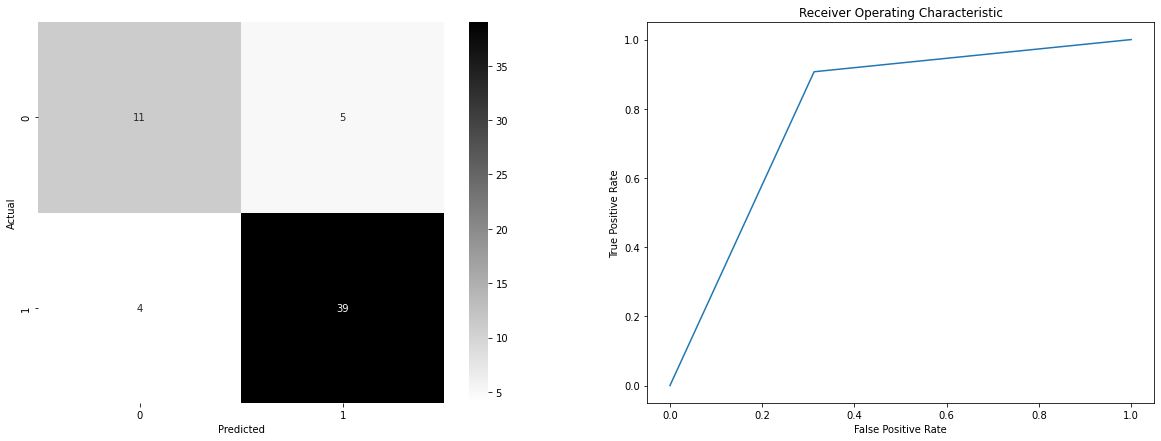

In [16]:
dt = DecisionTreeClassifier()
Model(dt, train_X, test_X, train_y, test_y, graph = True)

## Bagging Classifier:
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

Accuracy %:  89.83050847457628
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.89      0.98      0.93        43

    accuracy                           0.90        59
   macro avg       0.91      0.83      0.86        59
weighted avg       0.90      0.90      0.89        59



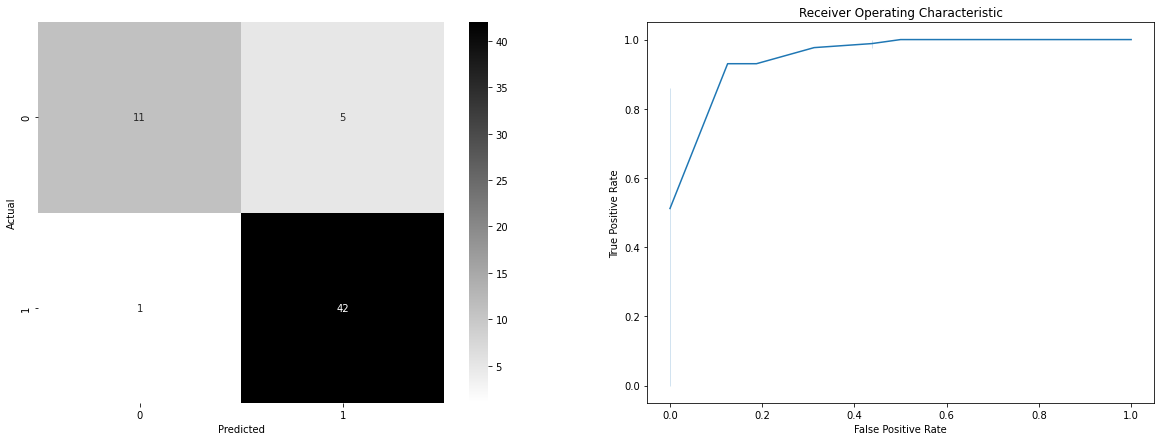

In [17]:
bc = BaggingClassifier()
Model(bc, train_X, test_X, train_y, test_y, graph = True)

# Plots:

In [18]:
status_value_counts = df['status'].value_counts()
print("Number of Parkinson's Disease patients: {} ({:.2f}%)".format(status_value_counts[1], status_value_counts[1] / df.shape[0] * 100))
print("Number of Healthy patients: {} ({:.2f}%)".format(status_value_counts[0], status_value_counts[0] / df.shape[0] * 100))

Number of Parkinson's Disease patients: 147 (75.38%)
Number of Healthy patients: 48 (24.62%)


## Plot to represent Healthy Patient VS Parkinson's Disease patients:

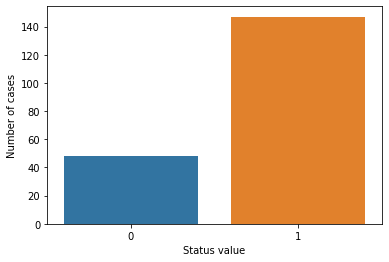

In [19]:
sn.countplot(df['status'].values)
plt.xlabel("Status value")
plt.ylabel("Number of cases")
plt.show()

## A bar plot for visualizing Important features:

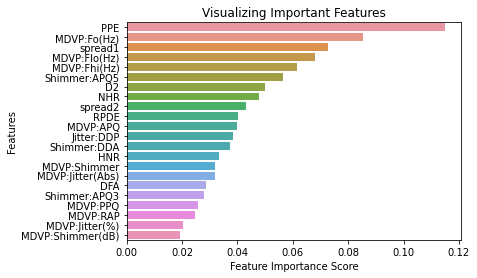

In [20]:
feature_imp = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
sn.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## A box plot for the attribute 'Average vocal fundamental frequency MDVP:Fo(Hz)' :

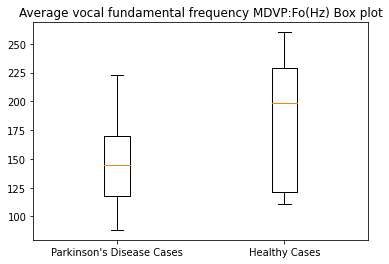

In [21]:
# Creating a box plot for the attribute 'Average vocal fundamental frequency MDVP:Fo(Hz)' 
diseased_freq_avg = df[df["status"] == 1]["MDVP:Fo(Hz)"].values
healthy_freq_avg = df[df["status"] == 0]["MDVP:Fo(Hz)"].values

plt.boxplot([diseased_freq_avg, healthy_freq_avg])
plt.title("Average vocal fundamental frequency MDVP:Fo(Hz) Box plot")
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

## Comparing accuracy of all the models:


|S.no | MODEL | ACCURACY |
|---:|:-------------|:------|
| 1 | XGBoost | 94.87179487179486 |
| 2 | Logistic Regression | 89.83050847457628 |
| 3 | Support Vector Machine | 84.7457627118644 |
| 4 | Guassian Naive Bayes | 77.96610169491525 |
| 5 | K Neighbour | 86.4406779661017 |
| 6 | Random Forest | 93.22033898305084 |
| 7 | Decision Tree | 84.7457627118644 |
| 8 | Bagging Algorithm | 89.83050847457628 |

### According to the accuracy table and graphs, Xgboost gives most valuable results as it's accuracy is most ( 94.87179487179486 ) and the graph and confusion Matrix supports this observation. Thus we can build a reliable model for prediction using Xgboost.


|S.no | Name | SlackUsername | Contribution | Partners |
|---:|:-------------|:-----------|:------|:------|
| 1 | Sanniya Middha  | @Sanniya01       | Logistic Regression   | Rachna Behl (@Rachna)     |
| 2 | Sophie Fang | @Sophie | Random Forest, Heat map, Feature importance map, Analysis of plot differences |   |
| 3 | Shalini Gupta | @Miss_IndoriDelight | Logistic Regression,K-Nearest Neighbors(Including Scatter Plot) and Support Vector | Bhavya Saini(@Bhavyasind) |
| 4 | Shruti Poojary | @ShrutiP | Random Forest (including FacetGrid plots) |   |
| 5 | Bhushan Wagh | @XR2 | Logistic Regression, K-Nearest Neighbors, Gaussian Naïve Bayes, Support Vector, Stacking, Decision Tree, Bagging, Random Forest (Including Scatter Plot) Histograms, Box, Bar, PairPlot, HeatMap |   |
| 6 | Ikechukwu Okoye | @Ikechukwu | Support Vector and Naive Bayes Classifier with necessary accuracy metrics and plots | @Mercii |
| 7 | Arinola | @Arinola | Wrote out the team's project protocol for the advertisement submission, Logistic linear regression | @Dibyendu1153533 |
| 8 | David Guevara-Apaza | @yoodavoo | EDA, pie chart, correlation and  heatmap, histograms, XGB, Bagging Algorithm, feature importance, ROC | Chukwuemelie Aginah @Chukwu_emeliela |
| 9 | Prathamesh Bobale | @Pratham99 | Scatter plot, logistic regression |   |
| 10 | Dibyendu Biswas | @Dibyendu11153533 | Workflow Advertisement designing, Logistic linear regression | @ShrutiP |
| 11 | Anirudh | @-anirudh1009- | Gaussian Naive Bayes, K-Nearest Neighbour |   |
| 12 | Aginah Chukwuemelie | @Chukwu_emeliela | EDA, pie chart, correlation and  heatmap, histograms, Bagging Algorithm, feature importance, ROC | David Guevara-Apaza |
| 13 | Foluso Ogunfile | @fogunfile | Logistic regression, nearest centroid classifier |   |
| 14 | Bhavya Saini | @Bhavyasind | Logistic & K-Nearest Neighbors : Scatter Plot, Write up for Markdown | Shalini Gupta |
| 15 | Vinay Joshi | @vinyjoshi | Github repo, All algorithms, Code for Markdown. |   |
| 16 | Team |   | All, XGBoost, Tutorials search | All |



# Check the Github Repo for Detailed Analysis and everyone's contribution to the work.